In [59]:
import numpy as np
import math
from typing import *
import matplotlib.pyplot as plt

In [2]:
p0, p1 = 0.04, 0.05

loaded_6 = 0.5
loaded_rest = 0.1

In [48]:
def generate_sequence(
    N: int = 1000,
    p0: float = p0, p1: float = p1,
    loaded_6: float = loaded_6, loaded_rest: float = loaded_rest,
) -> np.ndarray:
    assert abs(loaded_6 + loaded_6 - 1) < 1e-9
    throws_sequence, which_dice = [], []
    act_dice = 0  # 0 - fair, 1 - loaded
    for i in range(N):
        which_dice.append(act_dice)
        r = np.random.rand()
        if act_dice == 0:
            dice_throw = np.random.choice([1, 2, 3, 4, 5, 6], p=[1 / 6] * 6)
            if r < p0:
                act_dice = 1
        else:
            dice_throw = np.random.choice([1, 2, 3, 4, 5, 6], p=[loaded_rest] * 5 + [loaded_6])
            if r < p1:
                act_dice = 0
        
        throws_sequence.append(dice_throw)
    return np.array(throws_sequence), np.array(which_dice)

In [127]:
def heuristic_model(sequence: np.ndarray, possible_length: int = 3) -> np.ndarray:
    N = len(sequence)
    
    preds = np.array([0] * N)
    i = 0
    while i < N:
        if sequence[i] == 6:
            idx = i
            while idx < N and sequence[idx] == 6:
                idx += 1
     
            if idx - i > possible_length:
                preds[i: idx] = 1
                
            i = idx
        else:
            i += 1
    
    return preds

In [49]:
sequence, targets = generate_sequence()

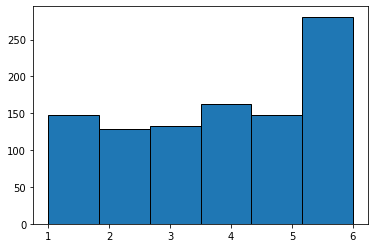

In [50]:
_ = plt.hist(sequence, bins=6, edgecolor='black')

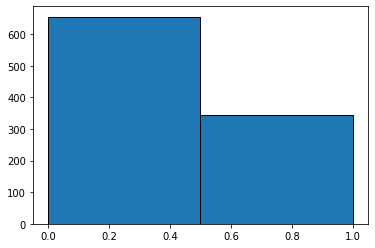

In [53]:
_ = plt.hist(targets, bins=2, edgecolor='black')

<BarContainer object of 1000 artists>

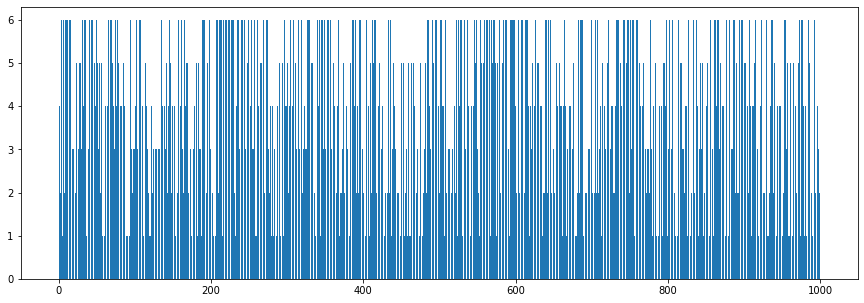

In [57]:
plt.figure(figsize=(15, 5))
plt.bar(np.arange(len(sequence)), sequence)

## Evaluate heuristic model

In [128]:
sequence, targets = generate_sequence()

In [151]:
preds = heuristic_model(sequence, possible_length=1)

In [152]:
print(f'Accuracy: {(preds == targets).mean() * 100 :.2f}%', )

Accuracy: 73.90%


Text(0.5, 1.0, 'Real')

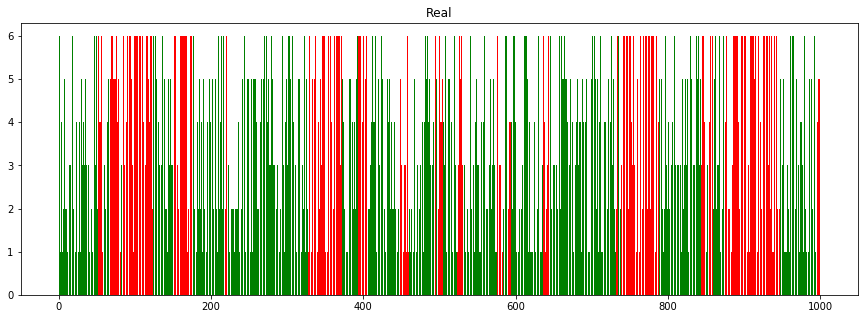

In [159]:
colors = np.array(['g', 'r'])[targets]
plt.figure(figsize=(15, 5))
plt.bar(np.arange(len(sequence)), sequence, color=colors)
plt.title('Real')

Text(0.5, 1.0, 'Predicted')

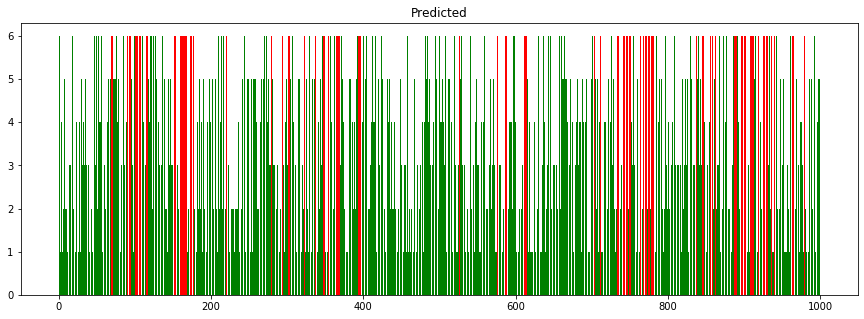

In [157]:
colors = np.array(['g', 'r'])[preds]
plt.figure(figsize=(15, 5))
plt.bar(np.arange(len(sequence)), sequence, color=colors)
plt.title('Predicted')